#Proyecto IA
1.   Daniel Eduardo Ortiz Celis H2
2.   Camilo Eduardo González Guerrero H1

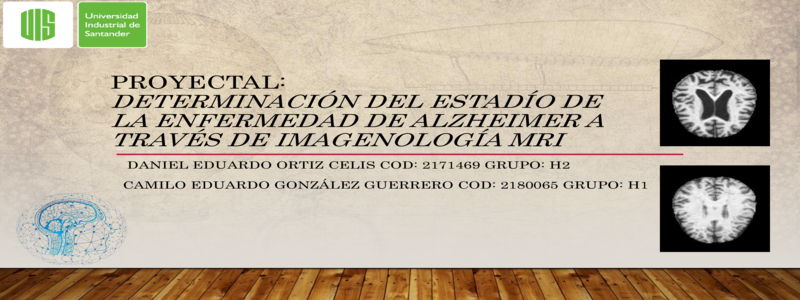

In [ ]:
from IPython.display import Image
Image('/content/gdrive/MyDrive/banner_final.png')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Determinación del estadío de la enfermedad de Alzheimer a través de imagenología MRI

Herramienta para la detección de estadío de la enfermedad de Alzheimer a través de imagenología MRI. Se desarrolla con el fin de servir de guía o para correlación por parte del profesional de Neurología. Está enfocado para ser un problema  Supervisado con fines de clasificación Multiclases(Estadíos de la Enfermedad)

 


In [ ]:
#@title Librerias
import os
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *

2.8.0


**Descargar Repositorio**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os   
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/Proyecto IA/Dataset_'

In [ ]:
%cd /content/gdrive/MyDrive/Proyecto IA/Dataset_ 

/content/gdrive/MyDrive/Proyecto IA/Dataset_


In [ ]:
!ls

data  kaggle.json


In [ ]:
!kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images

 91% 31.0M/34.1M [00:00<00:00, 160MB/s]
100% 34.1M/34.1M [00:00<00:00, 135MB/s]


In [ ]:
!mkdir data
!mv alzheimers-dataset-4-class-of-images.zip data

In [ ]:
%cd data

/content/gdrive/MyDrive/Proyecto IA/Dataset_/data


##### Desconprimimos el dataset

In [ ]:
!unzip alzheimers-dataset-4-class-of-images.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem207.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem208.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem209.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem21.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem210.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem211.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem212.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem213.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem214.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem215.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem216.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem217.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem218.jpg  
  inflating: Alzheimer_s Dataset/trai

##### Comenzamos a trabajar con el dataset

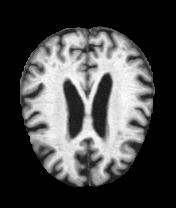

In [ ]:
#@title Verificar importación del Repositorio
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/gdrive/MyDrive/Proyecto IA/Dataset_/data/Alzheimer_s Dataset/test/MildDemented/30 (19).jpg')
cv2_imshow(img)

In [ ]:
#@title Cargamos las imagenes de los NonDemented
NonDemented = "/content/gdrive/MyDrive/Proyecto IA/Dataset_/data/Alzheimer_s Dataset/train/NonDemented"
images_NonDemented = []
image_size_a = 44 
image_size_b = 52

for image in os.listdir(NonDemented):
  image = cv2.imread(os.path.join(NonDemented, image))
  image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image_gray_resize = cv2.resize(image_gray, (image_size_a, image_size_b))
  images_NonDemented.append([image_gray_resize]) 

  


In [ ]:



#@title Cargamos las imagenes de los MildDemented
MildDemented = "/content/gdrive/MyDrive/Proyecto IA/Dataset_/data/Alzheimer_s Dataset/train/MildDemented"
images_MildDemented = []
image_size_a = 44 
image_size_b = 52

for image in os.listdir(MildDemented):
  image = cv2.imread(os.path.join(MildDemented, image))
  image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image_gray_resize = cv2.resize(image_gray, (image_size_a, image_size_b))
  images_MildDemented.append([image_gray_resize]) 


  

In [ ]:
#@title Cargamos las imagenes de los ModerateDemented
ModerateDemented = "/content/gdrive/MyDrive/Proyecto IA/Dataset_/data/Alzheimer_s Dataset/train/ModerateDemented"
images_ModerateDemented = []
image_size_a = 44 
image_size_b = 52

for image in os.listdir(ModerateDemented):
  image = cv2.imread(os.path.join(ModerateDemented, image))
  image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image_gray_resize = cv2.resize(image_gray, (image_size_a, image_size_b))
  images_ModerateDemented.append([image_gray_resize]) 


In [ ]:
#@title Cargamos las imagenes de los VeryMildDemented
VeryMildDemented = "/content/gdrive/MyDrive/Proyecto IA/Dataset_/data/Alzheimer_s Dataset/train/VeryMildDemented"
images_VeryMildDemented = []
image_size_a = 44 
image_size_b = 52

for image in os.listdir(VeryMildDemented):
  image = cv2.imread(os.path.join(VeryMildDemented, image))
  image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image_gray_resize = cv2.resize(image_gray, (image_size_a, image_size_b))
  images_VeryMildDemented.append([image_gray_resize]) 


In [ ]:
print(len(images_NonDemented))
print(len(images_MildDemented))
print(len(images_ModerateDemented))
print(len(images_VeryMildDemented))

2560
717
52
1792


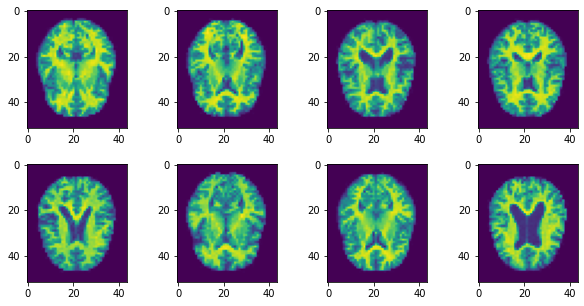

In [ ]:
#@title Imágenes NonDemented
plt.figure(1, figsize=(10,5))
n = 0
images_NonDemented = np.array(images_NonDemented)
for i in range(8):
  n += 1
  r = np.random.randint(0, images_NonDemented.shape[0], 1)
  plt.subplot(2, 4, n)
  plt.subplots_adjust(hspace = 0.3, wspace = 0.4)
  plt.imshow(np.squeeze(images_NonDemented[r[0]]))

plt.show()

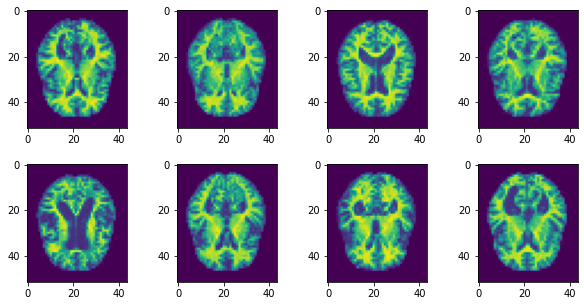

In [ ]:
#@title Imágenes MildDemented
plt.figure(1, figsize=(10,5))
n = 0
images_MildDemented = np.array(images_MildDemented)
for i in range(8):
  n += 1
  r = np.random.randint(0, images_MildDemented.shape[0], 1)
  plt.subplot(2, 4, n)
  plt.subplots_adjust(hspace = 0.3, wspace = 0.4)
  plt.imshow(np.squeeze(images_MildDemented[r[0]]))

plt.show()

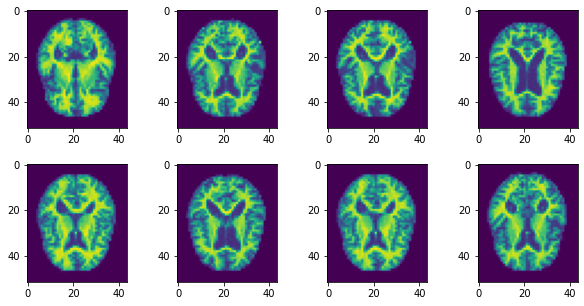

In [ ]:
#@title Imágenes ModerateDemented
plt.figure(1, figsize=(10,5))
n = 0
images_ModerateDemented = np.array(images_ModerateDemented)
for i in range(8):
  n += 1
  r = np.random.randint(0, images_ModerateDemented.shape[0], 1)
  plt.subplot(2, 4, n)
  plt.subplots_adjust(hspace = 0.3, wspace = 0.4)
  plt.imshow(np.squeeze(images_ModerateDemented[r[0]]))

plt.show()

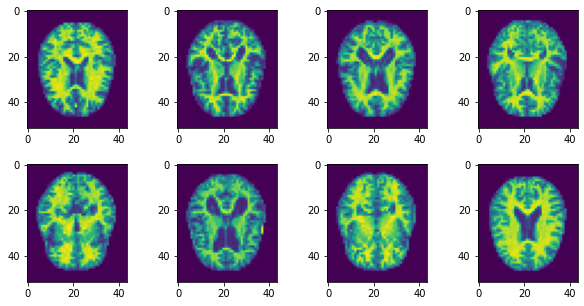

In [ ]:
#@title Imágenes VeryMildDemented
plt.figure(1, figsize=(10,5))
n = 0
images_VeryMildDemented = np.array(images_VeryMildDemented)
for i in range(8):
  n += 1
  r = np.random.randint(0, images_VeryMildDemented.shape[0], 1)
  plt.subplot(2, 4, n)
  plt.subplots_adjust(hspace = 0.3, wspace = 0.4)
  plt.imshow(np.squeeze(images_VeryMildDemented[r[0]]))

plt.show()

In [ ]:
print(images_NonDemented.shape, images_MildDemented.shape,images_ModerateDemented.shape ,images_VeryMildDemented.shape)

(2560, 1, 52, 44) (717, 1, 52, 44) (52, 1, 52, 44) (1792, 1, 52, 44)


In [ ]:
#@title Verificación de dimensiones
images_NonDemented_resize = np.resize(images_NonDemented, (2560, 2288))
images_MildDemented_resize = np.resize(images_MildDemented, (717, 2288))
images_ModerateDemented_resize = np.resize(images_ModerateDemented, (52, 2288))
images_VeryMildDemented_resize = np.resize(images_VeryMildDemented, (1792, 2288))

print(images_NonDemented_resize.shape)
print(images_MildDemented_resize.shape)
print(images_ModerateDemented_resize.shape)
print(images_VeryMildDemented_resize.shape)

(2560, 2288)
(717, 2288)
(52, 2288)
(1792, 2288)


In [ ]:
#@title Creamos el dataset y se redimensiona
images_NonDemented_resize = np.resize(images_NonDemented, (2560, 2288))
images_MildDemented_resize = np.resize(images_MildDemented, (717, 2288))
images_ModerateDemented_resize = np.resize(images_ModerateDemented, (52, 2288))
images_VeryMildDemented_resize = np.resize(images_VeryMildDemented, (1792, 2288))

#asignamos las etitquetas y concatenamos los dataset
images_NonDemented_resize = pd.DataFrame(images_NonDemented_resize)
images_MildDemented_resize = pd.DataFrame(images_MildDemented_resize)
images_ModerateDemented_resize = pd.DataFrame(images_ModerateDemented_resize)
images_VeryMildDemented_resize = pd.DataFrame(images_VeryMildDemented_resize)


# 0 -> NonDemented
# 1 -> VeryMildDemented
# 2 -> MildDemented
# 3 -> ModerateDemented

images_NonDemented_resize['label'] = 0
images_VeryMildDemented_resize['label'] = 1
images_MildDemented_resize['label'] = 2
images_ModerateDemented_resize['label'] = 3

Datas = images_NonDemented_resize
Datas = Datas.append(images_VeryMildDemented_resize, ignore_index = True)
Datas = Datas.append(images_MildDemented_resize, ignore_index = True)
Datas = Datas.append(images_ModerateDemented_resize, ignore_index = True)

#Se revuelven los datos
Datas = np.random.permutation(np.random.permutation(np.random.permutation(Datas.values)))

print(Datas.shape)
pd.DataFrame(Datas).tail(25)

(5121, 2289)


,0,1,2,3,4,5,6,7,8,9,...,2279,2280,2281,2282,2283,2284,2285,2286,2287,2288
5096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#@title Partimos el dataset para las etapas de entrenamiento(80%) y  testeo(20%)
#Normalizamos
X = Datas[:,:-1]
y = Datas[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle=True)


In [ ]:
#@title Estimadores y precisión

import time
inicio = time.time()

# Código a medir
time.sleep(1)
# -------------

fin = time.time()
print(fin-inicio) # 1.0005340576171875

estimador_NB = GaussianNB()
estimador_RFC = RandomForestClassifier(max_depth=20)
estimador_DTC = DecisionTreeClassifier(max_depth=20)
estimador_SVCLinear = SVC(kernel = "linear")
estimador_SVCPoly = SVC(kernel = "poly")
estimador_SVCRbf = SVC(kernel = "rbf")

#Entrenamiento y score
inicio = time.time()
estimador_NB.fit(X_train, y_train)
score_NB = estimador_NB.score(X_test, y_test)
time.sleep(1)
fin = time.time()
NB=(fin-inicio) # 1.0005340576171875

score_NB1 = estimador_NB.predict(X_test)
scr1=np.std(score_NB1==y_test)

inicio = time.time()
estimador_RFC.fit(X_train, y_train)
score_RFC = estimador_RFC.score(X_test, y_test)
time.sleep(1)
fin = time.time()
RFC=(fin-inicio) # 1.0005340576171875

score_RFC1 = estimador_RFC.predict(X_test)
scr2=np.std(score_RFC1==y_test)


inicio = time.time()
estimador_DTC.fit(X_train, y_train)
score_DTC = estimador_DTC.score(X_test, y_test)
time.sleep(1)
fin = time.time()
DTC=(fin-inicio) # 1.0005340576171875

score_DTC1 = estimador_DTC.predict(X_test)
scr3=np.std(score_DTC1==y_test)



inicio = time.time()
estimador_SVCLinear.fit(X_train, y_train)
score_SVCLinear = estimador_SVCLinear.score(X_test, y_test)
time.sleep(1)
fin = time.time()
SVCT=(fin-inicio) # 1.0005340576171875
score_SVCLinear1 = estimador_SVCLinear.predict(X_test)
scr4=np.std(score_SVCLinear1==y_test)


inicio = time.time()
estimador_SVCPoly.fit(X_train, y_train)
score_SVCPoly = estimador_SVCPoly.score(X_test, y_test)
time.sleep(1)
fin = time.time()
SVCPoly=(fin-inicio) # 1.0005340576171875
score_SVCPoly1 = estimador_SVCPoly.predict(X_test)
scr5=np.std(score_SVCPoly1==y_test)


inicio = time.time()
estimador_SVCRbf.fit(X_train, y_train)
score_SVCRbf = estimador_SVCRbf.score(X_test, y_test)
time.sleep(1)
fin = time.time()
SVCRbf=(fin-inicio) # 1.0005340576171875
score_SVCRbf1 = estimador_SVCRbf.predict(X_test)
scr6=np.std(score_SVCRbf1==y_test)
print("GaussianNB:  "+"{0:.4f}".format(score_NB)+" STD "+"{0:.4f}".format(scr1)+"\nRandom Forest:  "+"{0:.4f}".format(score_RFC)+" STD "+"{0:.4f}".format(scr2)+"\nDecision Tree:  "+"{0:.4f}".format(score_DTC)+" STD "+"{0:.4f}".format(scr3)+"\nSVCLinear:"+"{0:.4f}".format(score_SVCLinear)+" STD "+"{0:.4f}".format(scr4)+"\nSVCPoly:"+"{0:.4f}".format(score_SVCPoly)+" STD "+"{0:.4f}".format(scr5)+"\nSVCRbf:"+"{0:.4f}".format(score_SVCRbf)+" STD "+"{0:.4f}".format(scr6))

1.001312255859375
GaussianNB:  0.5600 STD 0.4964
Random Forest:  0.9346 STD 0.2472
Decision Tree:  0.7454 STD 0.4357
SVCLinear:0.9678 STD 0.1765
SVCPoly:0.9122 STD 0.2830
SVCRbf:0.7541 STD 0.4306


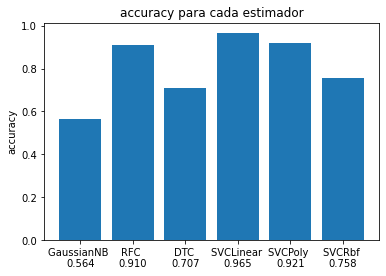

In [ ]:
#@title Comparación de clasificadores

estimadores = ["GaussianNB \n"+"{0:.3f}".format(score_NB),"RFC \n"+"{0:.3f}".format(score_RFC),"DTC \n"+"{0:.3f}".format(score_DTC),"SVCLinear \n"+"{0:.3f}".format(score_SVCLinear),"SVCPoly \n"+"{0:.3f}".format(score_SVCPoly),"SVCRbf \n"+"{0:.3f}".format(score_SVCRbf)]
accuracy = [score_NB,score_RFC,score_DTC,score_SVCLinear,score_SVCPoly,score_SVCRbf]
fig, ax = plt.subplots()
ax.set_ylabel('accuracy')
ax.set_title('accuracy para cada estimador')
plt.bar(estimadores, accuracy)
plt.show()



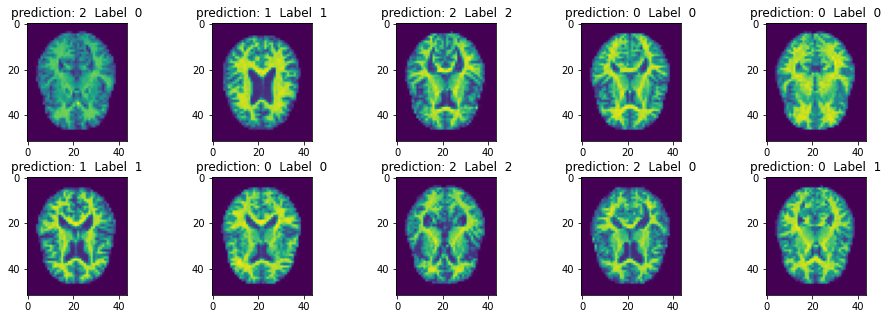

              precision    recall  f1-score   support

           0       0.70      0.69      0.69       543
           1       0.29      0.51      0.37       196
           2       0.64      0.31      0.42       274
           3       1.00      1.00      1.00        12

    accuracy                           0.56      1025
   macro avg       0.66      0.63      0.62      1025
weighted avg       0.61      0.56      0.56      1025

1.2329685688018799


In [ ]:
#@title Desempeño Gaussian Naive Bayes
plt.figure(1, figsize=(16,5))
n=0
for i in range(10):
  n += 1
  r = np.random.randint(0, X_test.shape[0], 1)
  plt.subplot(2, 5, n) #numero de filas y cantidad de columnas de la grafica
  plt.subplots_adjust(hspace = 0.3, wspace =0.2)
  plt.imshow(np.squeeze(X_test[r].reshape(1, 52, 44)))
  plt.title("prediction: "+str(int(estimador_NB.predict(X_test[r])))+"  "+"Label  "+str(int((y_test[r]))))

plt.show()

from sklearn.metrics import classification_report

informe = (classification_report(estimador_NB.predict(X_test), y_test))

print(informe)

print(NB)

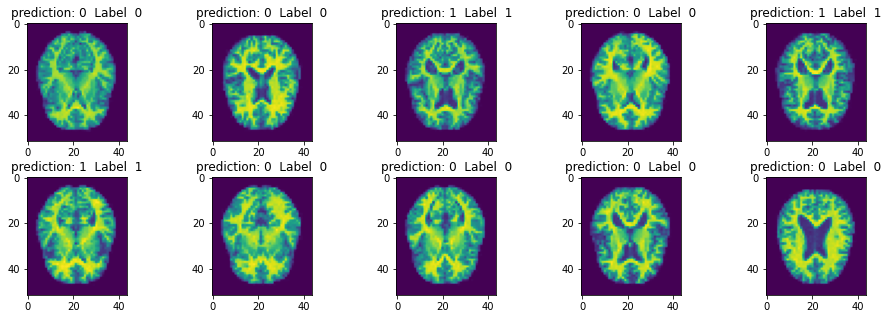

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       582
           1       0.90      0.94      0.92       327
           2       0.83      1.00      0.91       110
           3       0.50      1.00      0.67         6

    accuracy                           0.93      1025
   macro avg       0.81      0.96      0.86      1025
weighted avg       0.94      0.93      0.94      1025

8.43287706375122


In [ ]:
#@title Desempeño Random Forest
plt.figure(1, figsize=(16,5))
n=0
for i in range(10):
  n += 1
  r = np.random.randint(0, X_test.shape[0], 1)
  plt.subplot(2, 5, n) #numero de filas y cantidad de columnas de la grafica
  plt.subplots_adjust(hspace = 0.3, wspace =0.2)
  plt.imshow(np.squeeze(X_test[r].reshape(1, 52, 44)))
  plt.title("prediction: "+str(int(estimador_RFC.predict(X_test[r])))+"  "+"Label  "+str(int((y_test[r]))))

plt.show()


from sklearn.metrics import classification_report

informe = (classification_report(estimador_RFC.predict(X_test), y_test))
print(informe)
print(RFC)

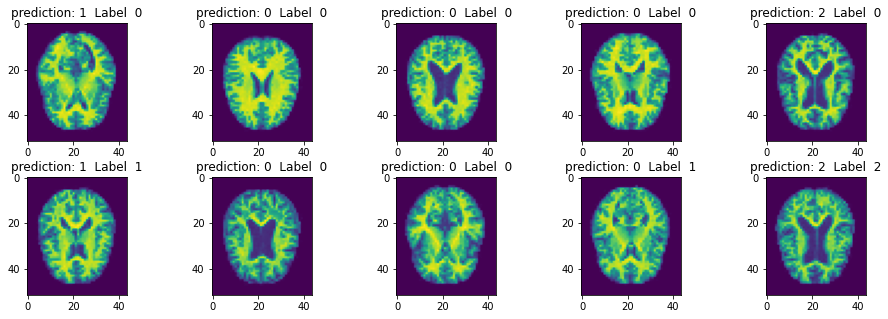

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       537
           1       0.71      0.70      0.70       342
           2       0.62      0.61      0.62       134
           3       0.50      0.50      0.50        12

    accuracy                           0.75      1025
   macro avg       0.66      0.66      0.66      1025
weighted avg       0.74      0.75      0.75      1025

5.929627418518066


In [ ]:
#@title Desempeño Decission Tree
plt.figure(1, figsize=(16,5))
n=0
for i in range(10):
  n += 1
  r = np.random.randint(0, X_test.shape[0], 1)
  plt.subplot(2, 5, n) #numero de filas y cantidad de columnas de la grafica
  plt.subplots_adjust(hspace = 0.3, wspace =0.2)
  plt.imshow(np.squeeze(X_test[r].reshape(1, 52, 44)))
  plt.title("prediction: "+str(int(estimador_DTC.predict(X_test[r])))+"  "+"Label  "+str(int((y_test[r]))))

plt.show()


from sklearn.metrics import classification_report

informe = (classification_report(estimador_DTC.predict(X_test), y_test))
print(informe)
print(DTC)

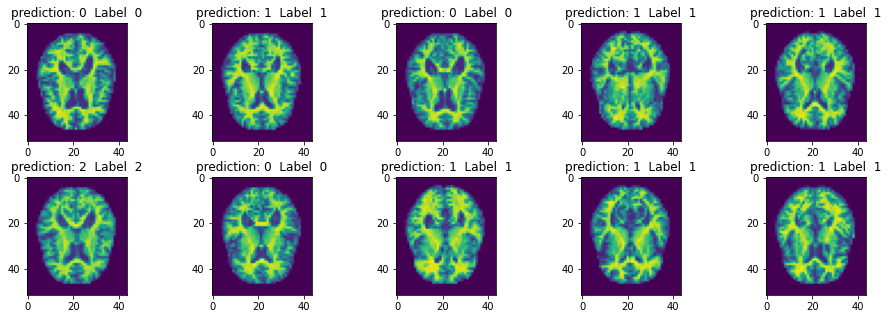

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       544
           1       0.96      0.96      0.96       339
           2       0.98      0.99      0.98       130
           3       1.00      1.00      1.00        12

    accuracy                           0.97      1025
   macro avg       0.98      0.98      0.98      1025
weighted avg       0.97      0.97      0.97      1025

16.474393129348755


In [ ]:
#@title Desempeño SVM
plt.figure(1, figsize=(16,5))
n=0
for i in range(10):
  n += 1
  r = np.random.randint(0, X_test.shape[0], 1)
  plt.subplot(2, 5, n) #numero de filas y cantidad de columnas de la grafica
  plt.subplots_adjust(hspace = 0.3, wspace =0.2)
  plt.imshow(np.squeeze(X_test[r].reshape(1, 52, 44)))
  plt.title("prediction: "+str(int(estimador_SVCLinear.predict(X_test[r])))+"  "+"Label  "+str(int((y_test[r]))))

plt.show()

from sklearn.metrics import classification_report

informe = (classification_report(estimador_SVCLinear.predict(X_test), y_test))
print(informe)
print(SVCT)

##Evaluando con Redes Neuronales





In [ ]:
#@title Redimensionando y Normalizando

X_train = X_train.reshape([-1, 44,52, 1])
X_test = X_test.reshape([-1, 44,52, 1])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)


print('Number of images in x_train', X_train.shape[0])
print('Number of images in x_test', X_test.shape[0])



y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=4)
print(y_train_ohe.shape, y_test_ohe.shape)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)



x_train shape: (4096, 44, 52, 1)
Number of images in x_train 4096
Number of images in x_test 1025
(4096, 4) (1025, 4)
(4096, 44, 52, 1) (4096,) (1025, 44, 52, 1) (1025,)


In [ ]:
#@title Modelo

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[44,52,1]),
    tf.keras.layers.Dense(1144, activation=tf.nn.relu),
    tf.keras.layers.Dense(572, activation=tf.nn.relu),
    tf.keras.layers.Dense(286, activation=tf.nn.relu),
    tf.keras.layers.Dense(143, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2288)              0         
                                                                 
 dense (Dense)               (None, 1144)              2618616   
                                                                 
 dense_1 (Dense)             (None, 572)               654940    
                                                                 
 dense_2 (Dense)             (None, 286)               163878    
                                                                 
 dense_3 (Dense)             (None, 143)               41041     
                                                                 
 dense_4 (Dense)             (None, 4)                 576       
                                                                 
Total params: 3,479,051
Trainable params: 3,479,051
Non-

In [ ]:
#@title Compilación del Modelo 
model.compile(optimizer=tf.keras.optimizers.Adam(),  #SGD()AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
#@title Entrenamiento del modelo
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
128/128 [==============================] - 3s 6ms/step - loss: 1.0300 - accuracy: 0.4998
Epoch 2/15
128/128 [==============================] - 1s 6ms/step - loss: 0.9259 - accuracy: 0.5554
Epoch 3/15
128/128 [==============================] - 1s 6ms/step - loss: 0.8729 - accuracy: 0.5793
Epoch 4/15
128/128 [==============================] - 1s 6ms/step - loss: 0.8570 - accuracy: 0.5854
Epoch 5/15
128/128 [==============================] - 1s 6ms/step - loss: 0.7885 - accuracy: 0.6162
Epoch 6/15
128/128 [==============================] - 1s 6ms/step - loss: 0.7559 - accuracy: 0.6504
Epoch 7/15
128/128 [==============================] - 1s 6ms/step - loss: 0.6868 - accuracy: 0.6956
Epoch 8/15
128/128 [==============================] - 1s 6ms/step - loss: 0.6243 - accuracy: 0.7292
Epoch 9/15
128/128 [==============================] - 1s 6ms/step - loss: 0.5958 - accuracy: 0.7444
Epoch 10/15
128/128 [==============================] - 1s 6ms/step - loss: 0.4960 - accuracy: 0.7852

In [ ]:
#@title Generando predicciones
predictions = model.predict(X_test)
print(predictions[500])
print("valor predicho:",  np.argmax(predictions[500]), "max prob: ", np.max(predictions[500]),
      "ground truth: ", y_test[500] )

[9.9230546e-01 7.6560164e-03 3.8435348e-05 1.5860464e-07]
valor predicho: 0 max prob:  0.99230546 ground truth:  0


In [ ]:
#@title Evaluación del Modelo 
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

33/33 [==============================] - 0s 6ms/step - loss: 0.3983 - accuracy: 0.8468
Test accuracy: 0.8468292951583862


La prediccion es:  1 El valor real es:  0


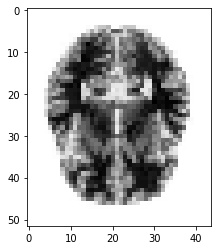

In [ ]:
from numpy.random.mtrand import randint
#@title **code** Usando el modeo para predecir
img_rows, img_cols =44, 52
image_index = randint(1,1000)
plt.imshow(X_test[image_index].reshape(52, 44),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, img_rows, img_cols, 1))
print("La prediccion es: ", pred.argmax(), "El valor real es: ",y_test[image_index] )

##Evaluando con Redes Convolucionales

In [ ]:
#@title Creación delModelo
model_CNN =  tf.keras.models.Sequential()
model_CNN.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(44, 52, 1)))
model_CNN.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model_CNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN.add(tf.keras.layers.Flatten())
model_CNN.add(tf.keras.layers.Dense(2288, activation='relu'))
model_CNN.add(tf.keras.layers.Dense(1144, activation='relu'))
model_CNN.add(tf.keras.layers.Dense(572, activation='relu'))
model_CNN.add(tf.keras.layers.Dense(286, activation='relu'))
model_CNN.add(tf.keras.layers.Dense(143, activation='relu'))
model_CNN.add(tf.keras.layers.Dense(4, activation='softmax'))
model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 44, 52, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 52, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 26, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 18304)             0         
                                                                 
 dense_5 (Dense)             (None, 2288)              41881840  
                                                                 
 dense_6 (Dense)             (None, 1144)              2618616   
                                                      

In [ ]:
#@title Compilación del Modelo 
model_CNN.compile(optimizer=tf.keras.optimizers.Adam(),  #SGD(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_CNN.fit(X_train, y_train_ohe, epochs=5)


Epoch 1/5
128/128 [==============================] - 12s 33ms/step - loss: 1.0243 - accuracy: 0.5017
Epoch 2/5
128/128 [==============================] - 4s 32ms/step - loss: 0.8374 - accuracy: 0.5906
Epoch 3/5
128/128 [==============================] - 4s 32ms/step - loss: 0.6689 - accuracy: 0.6980
Epoch 4/5
128/128 [==============================] - 4s 32ms/step - loss: 0.4482 - accuracy: 0.8103
Epoch 5/5
128/128 [==============================] - 4s 32ms/step - loss: 0.2225 - accuracy: 0.9194


In [ ]:
#@title Evaluación del Modelo 
test_loss, test_acc = model_CNN.evaluate(X_test, y_test_ohe)

print('Test accuracy:', test_acc)

33/33 [==============================] - 0s 10ms/step - loss: 0.2560 - accuracy: 0.9141
Test accuracy: 0.914146363735199


La prediccion es:  2 El valor real es:  2


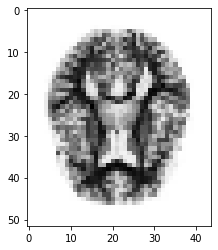

In [ ]:
from numpy.random.mtrand import randint
#@title **code** Usando el modeo para predecir
img_rows, img_cols =44, 52
image_index = randint(1,1000)
plt.imshow(X_test[image_index].reshape(52, 44),cmap='Greys')
pred = model_CNN.predict(X_test[image_index].reshape(1, img_rows, img_cols, 1))
print("La prediccion es: ", pred.argmax(), "El valor real es: ",y_test[image_index] )